!pip3 install labelImg
!pip install PyQt5
!pip install lxml

In [2]:
import torch

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
torch.cuda.is_available()

True

In [5]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 14130, done.
remote: Total 14130 (delta 0), reused 0 (delta 0), pack-reused 14130
Receiving objects: 100% (14130/14130), 13.47 MiB | 6.98 MiB/s, done.
Resolving deltas: 100% (9717/9717), done.


In [6]:
cd yolov5

/content/yolov5


In [7]:
!pip install -qr requirements.txt # install dependencies
!pip install -q roboflow

     |████████████████████████████████| 182 kB 6.3 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 1.6 MB 66.3 MB/s 
     |████████████████████████████████| 41 kB 627 kB/s 
     |████████████████████████████████| 67 kB 4.6 MB/s 
     |████████████████████████████████| 145 kB 63.3 MB/s 
     |████████████████████████████████| 178 kB 68.7 MB/s 
     |████████████████████████████████| 54 kB 3.2 MB/s 
     |████████████████████████████████| 138 kB 72.2 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 


In [8]:
import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.12.1+cu113 (Tesla T4)


In [ ]:
!python ./train.py --img 640 --batch 16 --epochs 50 --data ../drive/MyDrive/Colab_Notebooks/custom_data.yaml --weights yolov5s.pt --cache

In [10]:
!python export.py --weights /content/drive/MyDrive/Colab_Notebooks/best.pt --include tflite --img 640

export: data=data/coco128.yaml, weights=['/content/drive/MyDrive/Colab_Notebooks/best.pt'], imgsz=[640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=12, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['tflite']
YOLOv5 🚀 v7.0-4-g7398d2d Python-3.7.15 torch-1.12.1+cu113 CPU

Fusing layers... 
Model summary: 212 layers, 20861016 parameters, 0 gradients, 47.9 GFLOPs

PyTorch: starting from /content/drive/MyDrive/Colab_Notebooks/best.pt with output shape (1, 25200, 8) (40.3 MB)

TensorFlow SavedModel: starting export with tensorflow 2.9.2...

                 from  n    params  module                                  arguments                     
2022-11-23 14:24:50.475569: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
  0          

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/Colab_Notebooks/best-fp16.tflite', force_reload=True)
model.eval()

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-11-20 Python-3.7.15 torch-1.12.1+cu113 CPU

Loading /content/drive/MyDrive/Colab_Notebooks/best-fp16.tflite for TensorFlow Lite inference...
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend()
)

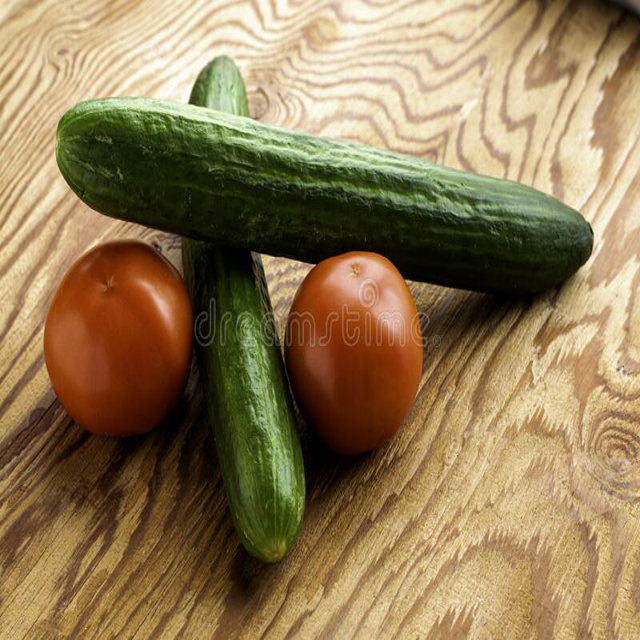

In [ ]:
import numpy as np
from PIL import Image

image = Image.open('/content/drive/MyDrive/Colab_Notebooks/images/train/100.jpg')
new_image = image.resize((640, 640))

result = model(new_image, size=640)
result.save()

Saved 1 image to runs/detect/exp9


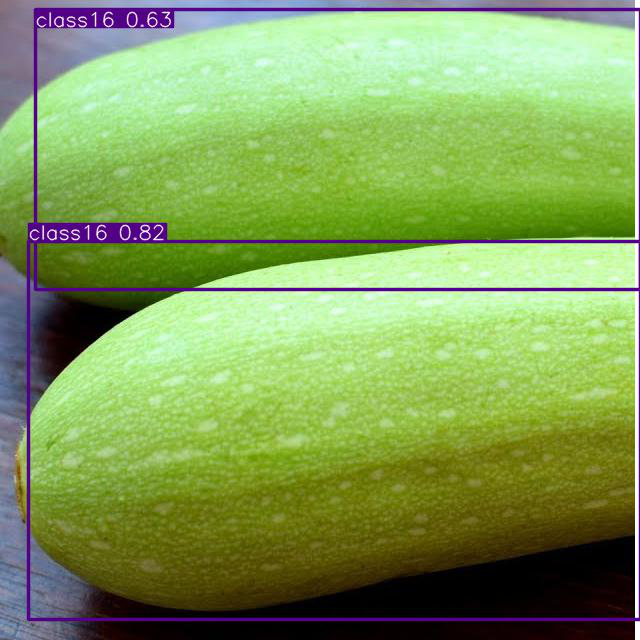

In [ ]:
imgResult = Image.open('/content/yolov5/runs/detect/exp6/1.jpg')
imgResult

In [ ]:
!python detect.py --weights /content/drive/MyDrive/Colab_Notebooks/best-fp16.tflite --img 640 --conf 0.25 --source /content/drive/MyDrive/Colab_Notebooks/images/val/355.jpg

detect: weights=['/content/drive/MyDrive/Colab_Notebooks/best-fp16.tflite'], source=/content/drive/MyDrive/Colab_Notebooks/images/val/355.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-266-g72cad39 Python-3.7.15 torch-1.12.1+cu113 CPU

Loading /content/drive/MyDrive/Colab_Notebooks/best-fp16.tflite for TensorFlow Lite inference...
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
image 1/1 /content/drive/MyDrive/Colab_Notebooks/images/val/355.jpg: 640x640 1 horse, 1061.2ms
Speed: 14.9ms pre-process, 1061.2ms inference, 2.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


In [ ]:
modelTFLite = torch.hub.load('ultralytics/yolov5', 'custom', '../lab03/Image_Set/yolov5/runs/train/exp2/weights/best-fp16.tflite', force_reload=True)

image 1/1: 533x800 2 cucumbers, 2 tomatoess
Speed: 14.1ms pre-process, 10.1ms inference, 1.4ms NMS per image at shape (1, 3, 448, 640)
Saved 1 image to runs/detect/exp9


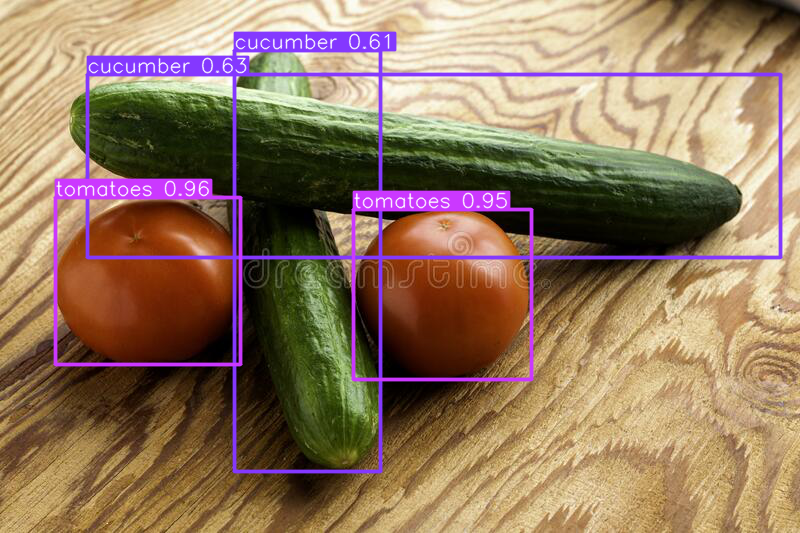

In [ ]:
import cv2
from PIL import Image

img = Image.open('/content/drive/MyDrive/Colab_Notebooks/images/train/100.jpg')

results = model(img, size=640)
results.print() 
results.save()
results.show()  # or .show(), .save(), .crop(), .pandas(), etc# or .show(), .save(), .crop(), .pandas(), etc

In [ ]:
import cv2
from PIL import Image

img = Image.open('../96.png')

results = model(img, size=640)
results.print() 
results.save()
results.show()

In [ ]:
import cv2
from PIL import Image

img = Image.open('../24.jpg')

results = model(img, size=640)
results.print() 
results.save()
results.show()